# Parser

In [1]:
from bs4 import BeautifulSoup
import lxml   

In [2]:
BeautifulSoup?

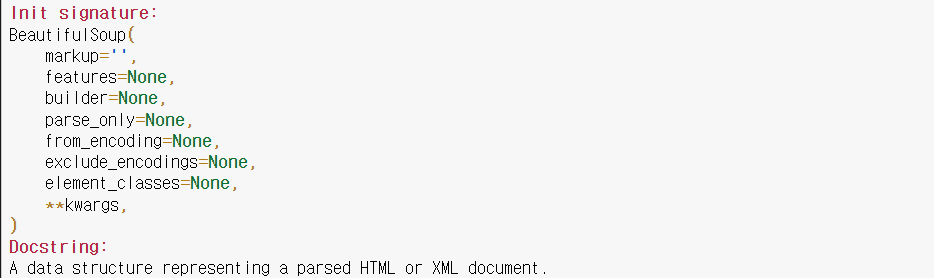

In [3]:
# sample
html = '''
<div id=prices >
    <table >
        <tr class=bb>
            <th class="bb lm lft">Date
            <th class="rgt bb">Open
            <th class="rgt bb">High
            <th class="rgt bb">Low
            <th class="rgt bb">Close
            <th class="rgt bb rm">Volume
        <tr>
            <td class="lm">Feb 28, 2014
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt rm">0
     </table>
'''

# <div>, <tr>, <th>, <td> 종료 태그가 없음

In [4]:
 #lxml의 HTML파서: 불완전한 코드들을 고쳐줌
BeautifulSoup(html, 'lxml')

<html><body><div id="prices">
<table>
<tr class="bb">
<th class="bb lm lft">Date
            </th><th class="rgt bb">Open
            </th><th class="rgt bb">High
            </th><th class="rgt bb">Low
            </th><th class="rgt bb">Close
            </th><th class="rgt bb rm">Volume
        </th></tr><tr>
<td class="lm">Feb 28, 2014
            </td><td class="rgt">100.71
            </td><td class="rgt">100.71
            </td><td class="rgt">100.71
            </td><td class="rgt">100.71
            </td><td class="rgt rm">0
     </td></tr></table>
</div></body></html>

In [5]:
# 파이썬 표준 html파서: 위에거랑 다르게 종료 태그를 맨 마지막에 몰아줌
BeautifulSoup(html, 'html.parser') 


<div id="prices">
<table>
<tr class="bb">
<th class="bb lm lft">Date
            <th class="rgt bb">Open
            <th class="rgt bb">High
            <th class="rgt bb">Low
            <th class="rgt bb">Close
            <th class="rgt bb rm">Volume
        <tr>
<td class="lm">Feb 28, 2014
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt rm">0
     </td></td></td></td></td></td></tr></th></th></th></th></th></th></tr></table>
</div>

# BS4 객체의 속성과 메서드

In [6]:
html_file = open('sample/market.html', encoding='utf-8')
html_src = html_file.read()
html_file.close()

**market.html**
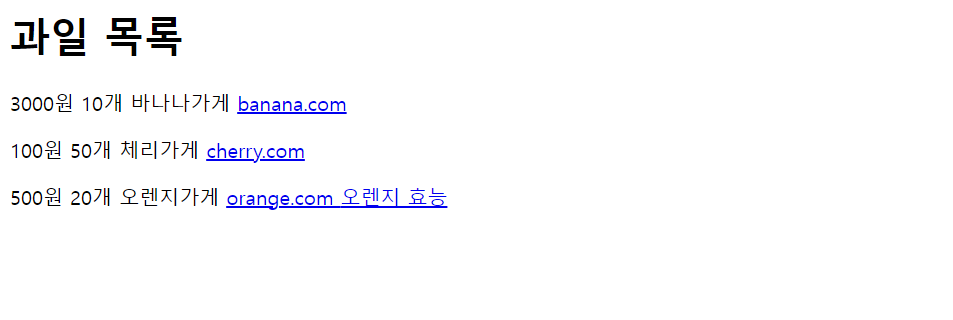

In [7]:
html_src

'<html>\n    <body>\n        <h1> 과일 목록 </h1>\n        <div>\n                <p id=\'banana\' class=\'fruit\' title=\'바나나\'>\n                      <span class = \'price\'> 3000원 </span>\n                      <span class = \'count\'> 10개 </span>\n                      <span class = \'store\'> 바나나가게 </span>\n                      <a href = \'https://www.banana.com\'> banana.com </a>\n                </p>\n                <p id=\'cherry\' class=\'fruit\' title=\'체리\'>\n                    <span class = \'price\'> 100원 </span>\n                    <span class = \'count\'> 50개 </span>\n                    <span class = \'store\'> 체리가게</span>\n                    <a href = \'https://www.cherry.com\'> cherry.com </a>\n                </p>\n                <p id=\'orange\' class=\'fruit best\' title=\'오렌지\'>\n                    <span class = \'price\'> 500원 </span>\n                    <span class = \'count\'> 20개 </span>\n                    <span class = \'store\'> 오렌지가게</span>\n        

In [8]:
print(html_src)

<html>
    <body>
        <h1> 과일 목록 </h1>
        <div>
                <p id='banana' class='fruit' title='바나나'>
                      <span class = 'price'> 3000원 </span>
                      <span class = 'count'> 10개 </span>
                      <span class = 'store'> 바나나가게 </span>
                      <a href = 'https://www.banana.com'> banana.com </a>
                </p>
                <p id='cherry' class='fruit' title='체리'>
                    <span class = 'price'> 100원 </span>
                    <span class = 'count'> 50개 </span>
                    <span class = 'store'> 체리가게</span>
                    <a href = 'https://www.cherry.com'> cherry.com </a>
                </p>
                <p id='orange' class='fruit best' title='오렌지'>
                    <span class = 'price'> 500원 </span>
                    <span class = 'count'> 20개 </span>
                    <span class = 'store'> 오렌지가게</span>
                    <a href = 'https://www.orange.com'> orange.com </

## DOM구조로 변환

In [9]:
# DOM구조로 변환
soup = BeautifulSoup(html_src, 'lxml') # soup은 BeautifulSoup의 인스턴스
type(soup)

bs4.BeautifulSoup

In [39]:
print(soup)

<html>
<body>
<h1> 과일 목록 </h1>
<div>
<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>
<p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 50개 </span>
<span class="store"> 체리가게</span>
<a href="https://www.cherry.com"> cherry.com </a>
</p>
<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>
</div>
</body>
</html>


## 메서드를 사용한 요소 탐색

### find
- soup.find/find_all(태그, id='orange', class_='fruit')
- find: 맨 처음에 발견된 하나만 찾아줌
- find_all: 모두 찾아서 리스트형태로 반환
- id와 class_만 가지고 찾음

In [11]:
soup.find?

In [12]:
soup.find('p')

<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>

In [13]:
soup.find_all('p')

[<p class="fruit" id="banana" title="바나나">
 <span class="price"> 3000원 </span>
 <span class="count"> 10개 </span>
 <span class="store"> 바나나가게 </span>
 <a href="https://www.banana.com"> banana.com </a>
 </p>,
 <p class="fruit" id="cherry" title="체리">
 <span class="price"> 100원 </span>
 <span class="count"> 50개 </span>
 <span class="store"> 체리가게</span>
 <a href="https://www.cherry.com"> cherry.com </a>
 </p>,
 <p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [41]:
soup.find('p', id='orange')

<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>

In [15]:
soup.find_all(class_='fruit') 
# 여기서 class는 group id같은 것 -> CSS 셀렉터? 나중에 디자인할 때 한번에 적용 가능

[<p class="fruit" id="banana" title="바나나">
 <span class="price"> 3000원 </span>
 <span class="count"> 10개 </span>
 <span class="store"> 바나나가게 </span>
 <a href="https://www.banana.com"> banana.com </a>
 </p>,
 <p class="fruit" id="cherry" title="체리">
 <span class="price"> 100원 </span>
 <span class="count"> 50개 </span>
 <span class="store"> 체리가게</span>
 <a href="https://www.cherry.com"> cherry.com </a>
 </p>,
 <p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

### select
- find와 select의 차이: select는 css 선택자 사용, 관계 연결 가능
- find와 select는 조건 방식이 다름
- find | select_one -> 단일 태그값만 반환
- find_all | select -> 모든 태그를 list로 반환

soup.select/select_one(태그, '#orange', '.fruit')

In [16]:
soup.select?

In [17]:
soup.select('p')

[<p class="fruit" id="banana" title="바나나">
 <span class="price"> 3000원 </span>
 <span class="count"> 10개 </span>
 <span class="store"> 바나나가게 </span>
 <a href="https://www.banana.com"> banana.com </a>
 </p>,
 <p class="fruit" id="cherry" title="체리">
 <span class="price"> 100원 </span>
 <span class="count"> 50개 </span>
 <span class="store"> 체리가게</span>
 <a href="https://www.cherry.com"> cherry.com </a>
 </p>,
 <p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [18]:
soup.select_one('p')

<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>

In [19]:
# css 셀렉터 문법을 사용!
soup.select('#orange') # id 속성 -> #

[<p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [20]:
soup.select_one('#orange')

<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>

In [21]:
soup.select('.price') # class 속성 -> .

[<span class="price"> 3000원 </span>,
 <span class="price"> 100원 </span>,
 <span class="price"> 500원 </span>]

In [22]:
soup.select('p#orange') #AND관계

[<p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [23]:
soup.select('a, .store')  # , = OR 관계

[<span class="store"> 바나나가게 </span>,
 <a href="https://www.banana.com"> banana.com </a>,
 <span class="store"> 체리가게</span>,
 <a href="https://www.cherry.com"> cherry.com </a>,
 <span class="store"> 오렌지가게</span>,
 <a href="https://www.orange.com"> orange.com </a>,
 <a href="https://www.orange.blog/">오렌지 효능</a>]

In [24]:
soup.select('.fruit.best') # 클래스값이 2개인 태그, 

[<p class="fruit best" id="orange" title="오렌지">
 <span class="price"> 500원 </span>
 <span class="count"> 20개 </span>
 <span class="store"> 오렌지가게</span>
 <a href="https://www.orange.com"> orange.com </a>
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>
 </p>]

In [25]:
soup.select('.fruit.best>a') # > : 자식관계. (공백주의)

[<a href="https://www.orange.com"> orange.com </a>]

In [27]:
soup.select('.fruit.best a') # > : 자손관계. (자식 + 손자 모두 보여줌)

[<a href="https://www.orange.com"> orange.com </a>,
 <a href="https://www.orange.blog/">오렌지 효능</a>]

In [28]:
soup.select('.fruit.best > span > a')

[<a href="https://www.orange.blog/">오렌지 효능</a>]

In [29]:
soup.select('.fruit>a')

[<a href="https://www.banana.com"> banana.com </a>,
 <a href="https://www.cherry.com"> cherry.com </a>,
 <a href="https://www.orange.com"> orange.com </a>]

In [30]:
mylist = soup.select('.fruit.best a')
type(mylist)

bs4.element.ResultSet

In [31]:
print(mylist)

[<a href="https://www.orange.com"> orange.com </a>, <a href="https://www.orange.blog/">오렌지 효능</a>]


In [33]:
for tagItem in mylist:
    print(tagItem.text) # 리스트 안에있는 텍스트 요소들을 추출

 orange.com 
오렌지 효능


In [36]:
print(tagItem)

<a href="https://www.orange.blog/">오렌지 효능</a>


In [38]:
# href: 속성, "https://" : 속성 값 -> (BeautifulSoup은 dictionary 형태로)
for item in mylist:
    print(item['href'])

https://www.orange.com
https://www.orange.blog/


In [42]:
items = soup.select('.fruit')
print(items) # 리스트의 각 요소들은 모두 객체!

[<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>, <p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 50개 </span>
<span class="store"> 체리가게</span>
<a href="https://www.cherry.com"> cherry.com </a>
</p>, <p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>]


In [46]:
for item in items:
    name = item['title']
    price = item.find('span', 'price').text
    count = item.find('span', 'count').text
    store = item.find('span', 'store').text
    print(f'{name} {price} {count} {store}')

바나나  3000원   10개   바나나가게 
체리  100원   50개   체리가게
오렌지  500원   20개   오렌지가게


## 요소의 속성 및 텍스트 반환

In [47]:
soup.find('p', id="orange")

<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>

In [49]:
e = soup.find('p', id="orange")
print(e)

<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>


In [50]:
e.name

'p'

In [51]:
e.attrs

{'id': 'orange', 'class': ['fruit', 'best'], 'title': '오렌지'}

In [52]:
e['title']

'오렌지'

In [59]:
print(e.string)

None


In [54]:
print(e.string)

None


In [56]:
e.strings

<generator object Tag._all_strings at 0x0000021AF38FFC40>

In [57]:
for item in e.strings:
    print(item)



 500원 


 20개 


 오렌지가게


 orange.com 




오렌지 효능






In [58]:
e.text

'\n 500원 \n 20개 \n 오렌지가게\n orange.com \n\n오렌지 효능\n\n'

## 트리 구조를 활용한 요소 탐색

In [60]:
e.parent # <div>

<div>
<p class="fruit" id="banana" title="바나나">
<span class="price"> 3000원 </span>
<span class="count"> 10개 </span>
<span class="store"> 바나나가게 </span>
<a href="https://www.banana.com"> banana.com </a>
</p>
<p class="fruit" id="cherry" title="체리">
<span class="price"> 100원 </span>
<span class="count"> 50개 </span>
<span class="store"> 체리가게</span>
<a href="https://www.cherry.com"> cherry.com </a>
</p>
<p class="fruit best" id="orange" title="오렌지">
<span class="price"> 500원 </span>
<span class="count"> 20개 </span>
<span class="store"> 오렌지가게</span>
<a href="https://www.orange.com"> orange.com </a>
<span>
<a href="https://www.orange.blog/">오렌지 효능</a>
</span>
</p>
</div>

In [61]:
e.parents # 모든 조상 요소 (조상들)

<generator object PageElement.parents at 0x0000021AF3E48340>

In [62]:
for item in e.parents:
    print(item.name)

div
body
html
[document]


In [63]:
# 모든 자손 요소(list)
e.contents

['\n',
 <span class="price"> 500원 </span>,
 '\n',
 <span class="count"> 20개 </span>,
 '\n',
 <span class="store"> 오렌지가게</span>,
 '\n',
 <a href="https://www.orange.com"> orange.com </a>,
 '\n',
 <span>
 <a href="https://www.orange.blog/">오렌지 효능</a>
 </span>,
 '\n']

In [64]:
# 모든 자식 요소(iter)
e.children

In [65]:
for item in e.children:
    print(item.name)

None
span
None
span
None
span
None
a
None
span
None
